In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/spring24/NLP499 group/data/data.csv')

data.shape

(1231142, 4)

In [ ]:
data.head()

,title,ingredients,directions,NER
0,Creamy Corn,"['2 (16 oz.) pkg. frozen corn', '1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...","['frozen corn', 'pepper', 'cream cheese', 'gar..."
1,Chicken Funny,"['1 large whole chicken', '2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...","['chicken gravy', 'cream of mushroom soup', 'c..."
2,Scalloped Corn,"['1 can cream-style corn', '1 can whole kernel...","[""Mix together both cans of corn, crackers, eg...","['egg', 'pepper', 'crackers', 'cream-style cor..."
3,Nolan'S Pepper Steak,"['1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...","['oil', 'tomatoes', 'green peppers', 'water', ..."
4,Double Cherry Delight,"['1 (17 oz.) can dark sweet pitted cherries', ...","[""Drain cherries, measuring syrup."", ""Cut cher...","['flavor gelatin', 'dark sweet pitted cherries..."


In [ ]:
import ast
# Convert the string representation of the list into an actual list
data['NER'] = data['NER'].apply(ast.literal_eval)

In [ ]:
NER_col = data['NER']

NER_col[0]

['frozen corn', 'pepper', 'cream cheese', 'garlic powder', 'butter', 'salt']

In [ ]:
dish_names = data['title']

dish_names

0                             Creamy Corn
1                           Chicken Funny
2                          Scalloped Corn
3                    Nolan'S Pepper Steak
4                   Double Cherry Delight
                        ...              
1231137      Baked Praline Ice Cream Cake
1231138            Weeknight Lasagna Toss
1231139          Basil Chicken Parmigiana
1231140    Mozzarella Meatball Sandwiches
1231141                        Devil Eggs
Name: title, Length: 1231142, dtype: object

In [ ]:
#get all unique ingredients
ingredients_vocab = set(ingredient for sublist in data['NER'] for ingredient in sublist)

ingredients_vocab

In [ ]:
total_count = len(data)
print("total count: ", total_count)

# Keywords related to different types of meat
meat_keywords = ['pork', 'beef', 'chicken', 'lamb', 'veal', 'duck', 'turkey', 'sausage', 'bacon', 'ham', 'salami', 'venison', 'rabbit', 'goose', 'quail', 'buffalo', 'moose', 'elk', 'ostrich', 'boar', 'kangaroo', 'horse', 'meatballs']
num_dishes_with_meat = sum(any(keyword in ingredient for keyword in meat_keywords) for dish in NER_col for ingredient in dish)

print("Number of dishes containing meat:", num_dishes_with_meat)

total count:  1231142
Number of dishes containing meat: 465318


In [ ]:
# Keywords related to different types of seafood
seafood_keywords = ['shrimp', 'salmon', 'tuna', 'crab', 'lobster', 'mussels', 'clams', 'oysters', 'squid', 'octopus', 'scallops', 'anchovies', 'sardines', 'cod', 'halibut', 'trout', 'mahi mahi', 'catfish', 'tilapia', 'haddock', 'swordfish', 'sea bass', 'snapper']
num_dishes_with_seafood = sum(any(keyword in ingredient for keyword in seafood_keywords) for dish in NER_col for ingredient in dish)

print("Number of dishes containing seafood:", num_dishes_with_seafood)

Number of dishes containing seafood: 68673


In [ ]:
#count those with popular meat
num_dishes_with_pork = sum('pork' in dish for dish in NER_col)
num_dishes_with_chicken = sum('chicken' in dish for dish in NER_col)
num_dishes_with_beef = sum('beef' in dish for dish in NER_col)
num_dishes_with_lamb = sum('lamb' in dish for dish in NER_col)

print("Number of dishes containing pork:", num_dishes_with_pork)
print("Number of dishes containing chicken:", num_dishes_with_chicken)
print("Number of dishes containing beef:", num_dishes_with_beef)
print("Number of dishes containing lamb:", num_dishes_with_lamb)

Number of dishes containing pork: 7609
Number of dishes containing chicken: 60452
Number of dishes containing beef: 9824
Number of dishes containing lamb: 1823


In [ ]:
num_dishes_with_egg = sum('egg' in dish for dish in NER_col)

print("Number of dishes containing egg:", num_dishes_with_egg)

Number of dishes containing egg: 95832


In [ ]:
# Keywords related to dessert ingredients
dessert_keywords = ['sugar', 'flour', 'butter', 'egg', 'vanilla extract', 'chocolate', 'cocoa powder', 'milk', 'cream', 'whipped cream', 'honey', 'maple syrup', 'fruit', 'berries', 'jam', 'jelly', 'custard', 'pudding', 'caramel', 'ice cream', 'cake', 'cookie', 'brownie', 'pie', 'cheesecake', 'baking powder', 'dry yeast', 'yeast']

# Count the number of dishes that contain at least two dessert ingredients
num_desserts = sum(sum(keyword in ingredient for keyword in dessert_keywords) >= 2 for dish in NER_col for ingredient in dish)

print("Number of dishes classified as desserts:", num_desserts)

Number of dishes classified as desserts: 73964


In [ ]:
soups_stews_keywords = ['soup', 'stew']
num_soups_stews = sum(any(keyword in dish.lower() for keyword in soups_stews_keywords) for dish in dish_names)

salad_dip_keywords = ['salad', 'dip']
num_salad_dip = sum(any(keyword in dish.lower() for keyword in salad_dip_keywords) for dish in dish_names)

num_main_course = total_count - num_salad_dip - num_soups_stews - num_desserts

# num_soups_stews = 0

# Iterate through each dish name
# for dish in dish_names:
#     # Check if any soup or stew keyword is present in the dish name
#     for keyword in soups_stews_keywords:
#         if keyword in dish.lower():
#             # If a keyword is found, increment the count and break the loop
#             print(f"{dish} ")
#             num_soups_stews += 1
#             break

print("Number of dishes classified as soups or stews:", num_soups_stews) #49863
print("Number of dishes classified as salad or dip:", num_salad_dip)
print("Number of dishes classified as main course:", num_main_course)

Number of dishes classified as soups or stews: 49863
Number of dishes classified as salad or dip: 110228
Number of dishes classified as main course: 1021188


In [ ]:
num_others = total_count - num_dishes_with_meat - num_dishes_with_seafood
num_others

697151

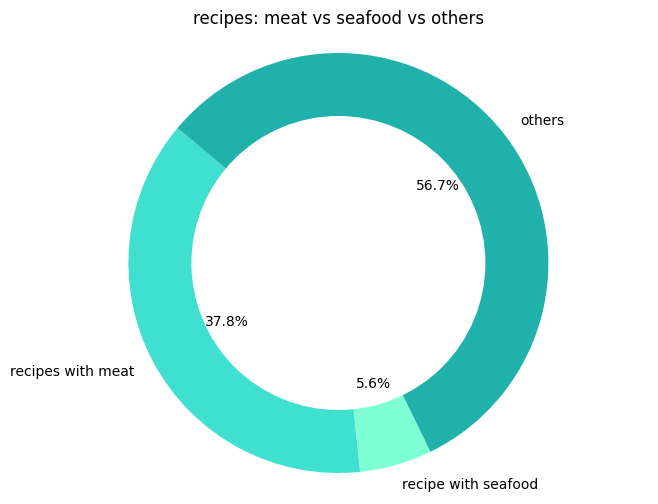

In [ ]:
import matplotlib.pyplot as plt


# Data to plot
labels = ['recipes with meat', 'recipe with seafood','others']
sizes = [num_dishes_with_meat/total_count, num_dishes_with_seafood/total_count, num_others/total_count]  # Percentages
colors = ['turquoise','aquamarine','lightseagreen'] #'#ffcc99'

# Plot
plt.figure(figsize=(8, 6))  # define the figure size
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('recipes: meat vs seafood vs others')

plt.show()

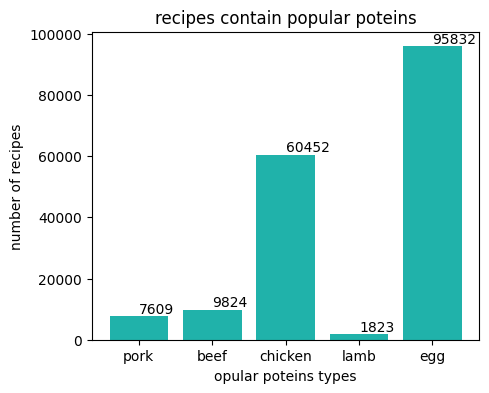

In [ ]:
# Data
categories = ['pork', 'beef', 'chicken', 'lamb', 'egg']
values = [num_dishes_with_pork, num_dishes_with_beef, num_dishes_with_chicken, num_dishes_with_lamb, num_dishes_with_egg]

# Plot
plt.figure(figsize=(5, 4))  # define the figure size
bars = plt.bar(categories, values, color='lightseagreen')

# Adding specific numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(yval), va='bottom')

# Adding title and labels
plt.title('recipes contain popular poteins')
plt.xlabel('opular poteins types')
plt.ylabel('number of recipes')

plt.show()

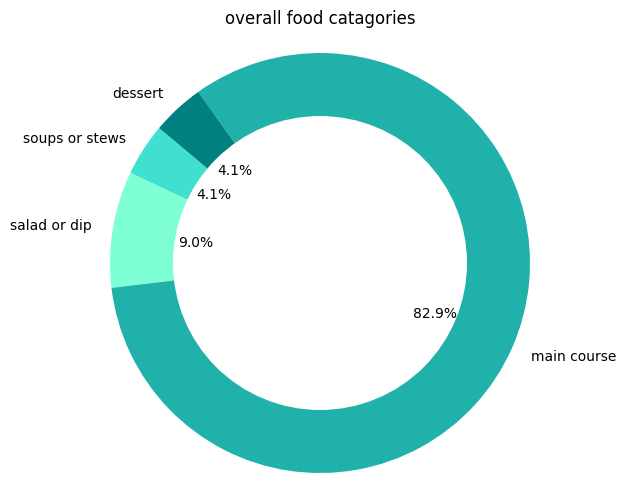

In [ ]:
# Data to plot
labels = ['soups or stews', 'salad or dip','main course', 'dessert']
sizes = [num_soups_stews/total_count, num_salad_dip/total_count, num_main_course/total_count, num_desserts/total_count]  # Percentages
colors = ['turquoise','aquamarine','lightseagreen', 'teal'] #'#ffcc99'

# Plot
plt.figure(figsize=(8, 6))  # define the figure size
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('overall food catagories')

plt.show()